<a href="https://colab.research.google.com/github/hyeonjh/machine-learning-python/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 베이즈 이론식 = P(A)*P(B|A) = P(B)*P(A|B)

# 나이브 베이즈 알고리즘 = 특정단어가 나타날 확률은 일일이 구할 수 없으므로 모두 같다고 생각함.
# X문서 = {단어1, 단어2, 단어3 ... } 일때에 ,  P(X|스팸) 인 확률은 서로 독립이라 가정하고 단순하게 P(단어1|스팸) * P(단어2|스팸) ... 으로 계산하

#적용 예시 
# 1. 콜센ㅌ처 상담전화가 걸려 올 떄에 쓰는 단어들 목록을 보고 유추하여 해당 전문상담원을 연결시켜 주는 모델
# 2. 결혼을 준비중인 30대 커플들의 선호하는 신혼가구들의 분포를 예측

# 감성분석 
# 1. 영화 댓글을 판별하여 긍정 / 부정을 예측하는 모델
# 2. 텍스트마이닝 -> 감성분석 -> nlp(자연어처리) 발전 


#나이브 베이즈  : 아주 간단하게 만든다는 의미.

# X집합이 나타났을때 스팸일 확률 (X 는 광고, 머신,수신 , 동의 , 통계 등 )
# P (정상 메일 | X  ) = p(정상메일 ) * p('광고 '| 정상메일 ) * P('동의' | 정상메일 ) .... 

In [18]:
#영화리뷰 데이터 
import pandas as pd 
import io
%pylab inline
import chardet

#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive/')

# train = pd.read_csv("imdb_master.csv",encording = result['encoding'])
filename = '/content/drive/MyDrive/Colab Notebooks/imdb_master.csv'

with open (filename ,'rb') as f:
  result= chardet.detect(f.read())

 #pandas read_csv로 불러오기
train = pd.read_csv(filename,encoding=result['encoding'])
train.head()

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [19]:
#train 데이터중 필요없느 데이터 제거 
train = train.drop(train.columns[[0,1,4]], axis = 1 )


In [20]:
train

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
99995,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,"Watching Time Chasers, it obvious that it was ...",unsup
99997,At the beginning we can see members of Troma t...,unsup
99998,"The movie was incredible, ever since I saw it ...",unsup


In [22]:
#neg = 0, pos = 1 로 바꾸기  -> 라벨에 넣음
train.label = [(l!='neg')*1 for l in train.label]
train.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [23]:
#컬럼 명 세팅 
d = train
d.columns = ['user_review', 'positive']
d.head()

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [26]:
# 트레이닝 세트 와 테스트 세트로 나눔 
split =0.7
d_train = d[:int(split*len(d))]
d_test = d [ int ((1-split)*len(d)):]

In [28]:
#피쳐를 추출 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(d_train.user_review)
features


<70000x121229 sparse matrix of type '<class 'numpy.int64'>'
	with 9598445 stored elements in Compressed Sparse Row format>

In [29]:
len(vectorizer.get_feature_names()), vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(121229,
 ['00',
  '000',
  '0000',
  '00000000000',
  '0000000000001',
  '000000003',
  '00000001',
  '00001',
  '0001',
  '00015',
  '000dm',
  '000s',
  '000â',
  '001',
  '002',
  '003',
  '003830',
  '004',
  '005',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '007â',
  '008',
  '0080',
  '0083',
  '009',
  '0091042',
  '0093638',
  '00am',
  '00o',
  '00pm',
  '00s',
  '00schneider',
  '01',
  '0126',
  '0148',
  '019',
  '01pm',
  '02',
  '020410',
  '022',
  '0230',
  '0267',
  '029',
  '03',
  '0312',
  '039',
  '04',
  '041',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '0615',
  '06th',
  '07',
  '07am',
  '07b',
  '08',
  '087',
  '089',
  '08th',
  '09',
  '0and',
  '0f',
  '0ne',
  '0r',
  '0s',
  '0tt',
  '10',
  '100',
  '1000',
  '10000',
  '100000',
  '1000000',
  '10000000000',
  '10000000000000',
  '10000th',
  '1000lb',
  '1000s',
  '1000th',
  '1000x',
  '1001',
  '1003',
  '1004',
  '100b',
  '100bt',
  '100ft',
  '100ibs',
  '100k',
  '100m',
  '100mi

In [30]:
# 3만건에서 100번쨰 칸까지 확인하기

i =30000
j = 100

words = vectorizer.get_feature_names()[i:i+30]
pd.DataFrame(features [ j:j+10,i:i+30].todense(), columns= words)

#단어와 frequency 로 존재. 

,dimanche,dimartino,dimas,dimbleby,dimbulb,dime,dimeco,dimension,dimensional,dimensionality,...,diminution,diminutive,dimitri,dimitriades,dimitrij,dimitrios,dimitrius,dimitrova,dimitru,dimitry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
#위에서 추출한 단어들 확인

words 

['dimanche',
 'dimartino',
 'dimas',
 'dimbleby',
 'dimbulb',
 'dime',
 'dimeco',
 'dimension',
 'dimensional',
 'dimensionality',
 'dimensionally',
 'dimensionless',
 'dimensions',
 'dimentional',
 'dimes',
 'dimestore',
 'diminish',
 'diminished',
 'diminishes',
 'diminishing',
 'diminution',
 'diminutive',
 'dimitri',
 'dimitriades',
 'dimitrij',
 'dimitrios',
 'dimitrius',
 'dimitrova',
 'dimitru',
 'dimitry']

In [32]:
#나이프 베이즈 모델 만들기 .
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB() #여러개의 범주를 예측하는 모델

model1.fit(features, d_train.positive) #fit으로 훈련, 피쳐와 , 예측해야할 타겟값 

pred1 = model1. predict_proba(vectorizer. transform (d_test.user_review )) # test 데이터
pred1 , pred1.shape

#결과해석 -> index 0 번째 -> neg , 1번쨰 -> pos / 합하면 1 (확률이므로)



(array([[1.00000000e+00, 1.89777939e-11],
        [9.99999967e-01, 3.29460894e-08],
        [9.99885531e-01, 1.14468753e-04],
        ...,
        [1.00000000e+00, 4.71360351e-10],
        [7.08223976e-01, 2.91776024e-01],
        [1.44847203e-12, 1.00000000e+00]]), (70000, 2))

In [40]:
#모델 평가하기 

from sklearn.metrics import accuracy_score, roc_auc_score , classification_report, roc_curve
def performance (y_true, pred, color = 'g', ann = True):
  acc = accuracy_score(y_true, pred[:,1] > 0.5) 
  auc = roc_auc_score(y_true, pred[:,1])  # roc- curve , 좌측상단에 붙을수록 좋은모델 
  fpr, tpr, thr = roc_curve(y_true,pred[:,1])
  plot(fpr,tpr,color,linewidth = "3")
  xlabel('false poisitive rate')
  ylabel('True positive rate')
  if ann : 
    annotate ( "Acc: %0.2f" % acc, (0.1,0.8), size = 14)
    annotate ( "AUC: %0.2f" % auc, (0.1,0.7),size= 14)
    

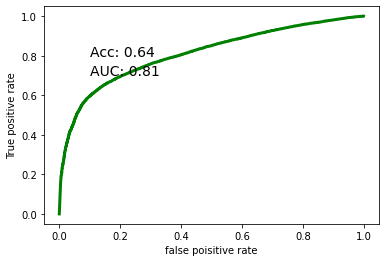

In [41]:
performance(d_test.positive, pred1) # 실제 관측값과 모델이 예측한값 비교 
#Acc - 64% , Auc 81%

In [48]:
#연습문제 
X = np.random.randint(5,size=(6,100))
y = np.array([1,2,3,4,5,6])

print(X)
print(y)



[[1 3 4 1 2 0 1 4 0 0 0 2 3 4 2 0 2 1 4 2 1 1 0 4 4 1 1 1 0 1 2 3 2 0 3 4
  4 1 4 0 0 1 2 4 1 1 2 0 2 1 0 4 0 1 2 4 1 2 0 4 1 1 4 1 4 4 3 2 3 2 1 4
  4 4 1 2 0 4 4 3 1 3 1 1 4 3 4 3 4 0 0 1 2 3 4 2 3 0 1 1]
 [0 2 1 0 0 2 3 4 3 1 4 4 2 0 0 3 1 1 0 4 3 1 4 4 3 0 4 4 3 1 2 4 4 4 0 1
  1 1 4 0 1 3 4 2 4 0 4 1 2 4 1 2 4 1 2 0 1 3 1 1 0 0 1 4 1 0 1 2 1 4 0 4
  0 4 3 0 0 0 1 2 2 3 4 3 3 4 3 1 0 1 3 4 4 0 3 1 3 4 4 4]
 [0 4 2 1 2 3 0 0 0 4 2 3 4 1 4 3 0 0 1 1 0 0 0 3 4 2 1 2 4 0 4 0 4 3 0 3
  4 1 1 3 2 2 3 2 0 0 2 3 4 1 4 4 2 2 3 3 3 4 4 4 4 1 1 4 3 0 2 3 1 0 3 3
  0 4 4 1 4 1 1 2 1 4 0 1 3 2 3 4 4 3 1 4 0 0 1 1 2 4 3 0]
 [4 1 1 2 0 0 4 1 4 1 3 1 2 4 3 2 4 0 1 4 0 4 2 3 4 4 4 0 1 3 4 4 0 4 3 3
  3 2 2 0 3 1 3 3 2 3 2 2 2 0 3 0 2 4 1 0 1 0 2 4 1 0 2 3 0 0 4 3 0 3 2 4
  2 0 3 2 3 3 0 0 0 0 4 0 2 0 3 1 4 2 4 0 0 0 2 1 1 2 1 1]
 [0 3 1 0 1 3 2 2 1 4 0 2 4 2 2 3 1 4 0 3 4 2 2 3 2 3 3 4 2 4 4 1 4 2 0 4
  1 3 2 2 4 1 0 4 3 2 0 3 3 3 1 3 0 3 0 0 4 4 1 4 4 1 2 4 1 1 4 3 2 0 1 1
  0 3 0 1 4 3 3 0 0 3 2 

In [56]:

#나이브 베이즈 모델을 만들고 위의 데이터를 훈련데이터로 삼아서 훈련하여 봅시다. 
# 모델의 이름은 clf 로 합니다. 

clf = MultinomialNB()
clf.fit(X,y)

#4번째 데이터의 class를 예측
print(clf.predict(X[3].reshape(1,100)))

#전체 훈련  데이터를 예측 

clf.predict(X)




[4]


array([1, 2, 3, 4, 5, 6])

MultinomialNB()